# 📊 SHAP Interpretation Report: RANDOM_FOREST
This notebook provides a post-hoc explanation of the model's predictions using **tree** SHAP.

---

### 🔍 What are SHAP Values?
**SHAP (SHapley Additive exPlanations)** decomposes a model's prediction into the contribution of each individual feature. 
* **Magnitude:** A larger absolute SHAP value means the feature had a bigger impact on the output.
* **Direction:** A positive SHAP value means the feature pushed the prediction *higher*, while a negative value pushed it *lower*.
* **Interpretation:** For any given sample, the sum of SHAP values plus the base value (average model output) equals the actual model prediction.

### 🧪 Methodology
**Tree SHAP** is an optimized algorithm for tree-based models (like Random Forest or XGBoost). It leverages the internal structure of the trees to calculate exact SHAP values significantly faster than model-agnostic methods.

---

### 📋 Metadata
**Model Architecture:** RANDOM_FOREST  
**Analysis Context:** tabular  
**Dataset Scope:** subset

---


In [1]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Data provided by the explainer
all_shap_dict = {0: [[-0.1195496571133129, -0.1942742078657132, -0.08367606690072672], [0.181299214313605, -0.09407810770172455, 0.11990785338355557], [-0.18456139479453706, -0.11468719484637667, -0.10397257886777726], [0.12364514033109625, -0.02357699480747072, -0.002882012845644602], [0.19400093114440425, -0.12244438881453124, -0.005692181155933337], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [-0.12759942068992391, 0.2487379473710311, -0.01284257578571655], [-0.14875992199955915, -0.17620927879096054, -0.01142855915462475], [-0.1964028119349241, -0.18625736668247458, -0.12266628111430276], [-0.12128652913029395, 0.2418646879617551, 0.006102380978052919], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [0.11919891123303479, -0.13305794717150693, 0.005897107382413855], [-0.20120489145359358, -0.1872502854517857, -0.09700167715618484], [-0.12478810652926423, -0.21469378219857663, -0.11752987866299465], [0.12333612458525464, -0.021914375233101236, -0.09408155270220987], [-0.18520171890047735, -0.039427415816454835, -0.11097251061135972], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [-0.08314096237340844, 0.16530143936093855, 0.15688969228826533], [0.06532504610058723, 0.03711019484012331, 0.14379548369697048], [-0.08554370773137508, 0.16536614378675898, 0.15606106655374488], [0.17310030134361876, -0.08489094949199184, 0.12006246528666621], [-0.1931271885848403, -0.14491797320695202, -0.08868302246621394], [-0.08635041349343471, -0.01889665744140685, -0.12381300149657816], [0.06816999426616771, 0.018735408483401234, 0.15850986741062636], [-0.11963535730098566, 0.0008672362377735437, 0.24614472200269943], [-0.18811108069945995, -0.2058746782782286, -0.12546911104172118], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [-0.18263788358058966, -0.21146983772536923, -0.11449088341452275], [0.07350202174211247, 0.16230842260966796, -0.01615837159157664], [-0.1327416253144925, 0.24854002295912098, -0.021944009344900556], [0.17291421420322511, -0.08776499425754358, 0.12445761615594916], [-0.18733789719169075, -0.1151480738088845, -0.08634470252794225], [0.12581955371641815, -0.023446404218608472, -0.0950329528478661], [-0.1258782432797639, 0.2499306757274465, -0.015212400408210876], [0.06955636772178297, 0.16477821415418992, 0.011400592291329507], [0.06478226587500094, 0.04197621134871762, 0.14747707833183687], [0.07421314711230989, -0.02599490431214805, 0.16615781681835545], [0.2014889324551749, -0.14326386353319973, -0.08280311561515304], [0.20293764597536915, -0.12998899906571212, -0.02690761001396988], [0.1638618537519383, -0.07592217832871108, 0.1203321417150658], [0.06824464771109794, 0.04242612647491755, 0.14356478136953993], [-0.1502006649285396, -0.1979652622732297, -0.058948642746372695], [0.1298639707556566, -0.0321458017773846, -0.053012511821821984], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [-0.18274071452009105, -0.2047350094252651, -0.1263238725404079], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [-0.05347967396804239, 0.024167854163781897, 0.2082570730712516], [-0.09114621830230718, -0.23936719838912077, -0.13525808897124822], [0.059910299639953396, 0.05783215361310704, 0.1332708800802728], [-0.18538285836093066, -0.028458031609462912, -0.111984308703148], [0.10016948196264952, 0.010642468106197973, -0.10616206029517232], [0.19657227503143448, -0.1392693996609443, -0.07665838904113502], [0.13125576484939716, 0.04395587489747866, 0.003348551725309659], [-0.19098799568060906, -0.2066890273387901, -0.12207463773188278], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [-0.07844921542131521, 0.16490980193582988, 0.15686456065694832], [-0.18448149586550885, -0.2150659122987946, -0.1250213149622082], [0.18513415515256657, -0.09273890486789228, -0.07464132369995306], [0.06816999426616771, 0.01865027738482838, 0.1585949985091992], [0.12308332066071101, 0.00017313660140138676, -0.04129382967518508], [0.12287258910450898, -0.02497947991954212, 0.0011718883199458678], [0.1941569123926656, -0.13726944097217844, -0.07224908265210765], [-0.06838827968631213, -0.008553439949585798, 0.2526963900334419], [0.06460401300651078, 0.019959529866017414, 0.15994263637857617], [0.057668740719345066, 0.19221577908349963, -0.060468537635000826], [-0.04566524777689772, 0.15616551360006967, 0.14378424346064764], [0.19272614347103614, -0.14393131622859714, -0.09405820404532221], [0.05181168559071357, 0.11019922696670746, 0.09323513518793715], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [0.18667366042113787, -0.06912033080312929, 0.028361498453516727], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [-0.1868945655210014, -0.16258953157947234, -0.11645107709194034], [-0.014605329300215535, 0.14020537723945778, 0.13107995206075782], [-0.18786290397107108, -0.036124744124526216, -0.12470095068660571], [0.11308884145486878, 0.013981888428884188, -0.08289133199405684], [-0.0924130520753384, 0.24853605243625998, -0.013589753739196755], [0.12830056416328076, 0.024102315015057774, 0.007787160984334743], [-0.04566524777689772, 0.15616551360006967, 0.14378424346064764], [0.03329824361821292, 0.11847123895015009, 0.10400142652254618], [-0.17949154382108318, -0.038304832691053683, -0.12748951788967097], [0.06122114579992219, 0.010723019733259929, 0.14495394033230016], [0.035385314116153005, 0.11844654898632968, 0.10284813689751743], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [0.03329824361821292, 0.11847123895015009, 0.10400142652254618], [-0.19319380429614347, 0.010393012874005892, -0.13780962222534723], [0.11317829404797253, 0.010077952939362244, -0.08485605135309247], [-0.18908953132678294, -0.19969888493612628, -0.11426193828171739], [0.06557492087595251, 0.036726735709298707, 0.14392906805242986], [0.13036320630035778, -0.04125243817075463, -0.08666905410048929], [-0.0360487989972564, -0.017253424788544858, -0.1145605620080755], [0.1952516244225395, -0.10678598764267166, 0.03772365163742608], [-0.08554370773137508, 0.16536614378675898, 0.15606106655374488], [-0.13420916208898895, 0.2719873801422087, -0.07084199578213608], [-0.08286874692377415, 0.16539892217155708, 0.15715332736134582], [0.09016142910290344, 0.18789050732282667, -0.0539411432887984], [0.05319835225738024, 0.10909589363337413, 0.09295180185460382], [-0.11170009709697433, 0.002421864952828913, 0.2447401620764384], [0.06465701412992075, 0.03758387856644157, 0.14398983194131873], [0.09237985047676076, 0.002541552109743724, -0.022569551473917794], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [-0.1186350308889524, 0.015280848366914478, 0.247799753060105], [0.12825529701936453, 0.04603532075395791, 0.030295645779107455], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [-0.18745318088878146, -0.04555010812975002, -0.10761352592355027], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [0.181299214313605, -0.09407810770172455, 0.11990785338355557], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [-0.13539058305275214, 0.27301602320600576, -0.09955553924147369], [0.06824464771109794, 0.04242612647491755, 0.14356478136953993], [0.18472365532176419, -0.09202750901014134, -0.014271025876120082], [0.06951192327733853, 0.16480043637641215, 0.011422814513551729], [0.06816999426616771, 0.01865027738482838, 0.1585949985091992], [-0.12349994877206406, -0.0123562716302821, -0.024751179834167622], [-0.0754818310500554, 0.27123755494259655, -0.06672880532940824], [-0.11200266201268244, 0.2796407667888805, -0.08270481394029479], [0.0661359248916376, 0.03629931604907293, 0.14379548369697048], [0.196364736569896, -0.13904370735325197, -0.07667654288728888], [-0.09176778598628571, -0.011827627766909429, -0.11396382766182155], [0.05319835225738024, 0.10909589363337413, 0.09295180185460382], [-0.18608017440809896, -0.21136166137073545, -0.11784482032614725], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [0.06824464771109794, 0.04082857374642742, 0.14516233409803], [-0.15836247490882938, -0.21991353310962727, -0.10513792011399094], [-0.11040960040129205, 0.25362598906160455, -0.01050276441674252], [0.20293764597536915, -0.12998899906571212, -0.02690761001396988], [-0.18890616461382756, -0.021406418216958278, -0.11414651511110795], [-0.08554370773137508, 0.16536614378675898, 0.15606106655374488], [-0.14920342988415178, -0.19408636288497266, -0.08488828956492205], [-0.048410450127269716, 0.1576642866502556, 0.14503067276083367], [0.181299214313605, -0.09407810770172455, 0.11990785338355557], [0.1643940526972343, -0.07626910233294709, -0.07803633369484704], [-0.1978406634438302, -0.025713408247717805, -0.04234803340833261], [-0.1906236115128022, -0.20506852671066303, -0.10114134970022344], [-0.12327463164763086, -0.009645703377086874, -0.11359327998865788], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [-0.11845610576665194, 0.02800732894984913, -0.10732969384177758], [-0.15235642323226709, -0.20391758015037365, -0.08331365861904998], [0.19616174911900058, -0.13897222347669266, -0.09120829907163404], [0.06460401300651078, 0.02358978274597476, 0.1563123834986188], [0.06773933104480681, 0.024729112226284548, 0.152946826889104], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [-0.13467923196033182, 0.27445732877081486, -0.07409015289271893], [0.11493785364489148, -0.16201117024117018, 0.007261110190400609], [-0.03635595747155595, 0.15142594109392427, 0.13921452566145134], [-0.1299642938927511, 0.27060982720330135, -0.09556408418129789], [0.13125576484939716, 0.04537001631162007, 0.007933082463940557], [0.035385314116153005, 0.11844654898632968, 0.10284813689751743], [0.06863846097575123, 0.16422121559719138, 0.006876825441587496], [-0.2029249738809226, 0.004249827422741885, -0.04027254839696863], [0.17807492608616582, -0.06543661311940561, 0.05663538634239447], [0.1250383368070988, -0.011645858767073233, 0.0022752692235342843], [0.11569556614054627, 0.006140487155629518, -0.08873426953991172], [-0.1910175449866941, -0.028765092584538975, -0.12126038527891407], [-0.16519051060323584, -0.1668646787766197, -0.05187616915449937], [0.19947322545556315, -0.1325960292271036, -0.03640907291188748], [0.18303387788837228, -0.08543858058309575, -0.07907188557929486], [-0.18376570366207678, -0.21011916781506887, -0.10210176585317855], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [-0.07334415935976882, 0.1669650282825076, 0.15504960527336156], [-0.12478810652926423, -0.21469378219857663, -0.11752987866299465], [-0.18586899230259382, -0.21280665231305632, -0.12234916479745618], [-0.1195496571133129, -0.19935618282806555, -0.09593966467572095], [0.053354608667636645, 0.10897276542824591, 0.0929186736494756], [0.05464193122358499, 0.2000246166009947, -0.06536143040174698], [0.11995669602588427, -0.017210887107274035, 0.05899961911785666], [-0.18170023046059045, -0.0481839243332516, -0.041006152301333365], [-0.04566524777689772, 0.15616551360006967, 0.14378424346064764], [0.06815893342538365, 0.042511840760631824, 0.14356478136953993], [-0.10695690138906275, 0.024285672555831004, 0.23701192369304847], [0.10838687817756539, -0.20084224534520662, 0.013433366115763658], [0.17382491280474954, -0.05243504239468065, 0.11476695482099396], [-0.19348060661122166, 0.004704781749145302, -0.039744816836760316], [-0.20259159819320297, -0.22452420041407617, -0.04094401687400105], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [0.09246421774015728, 0.18928140411111255, -0.06303124815167828], [0.18953305184175617, -0.10320640925059142, -0.0776202610539886], [0.06747399538693323, 0.03341996713856011, 0.153341593030062], [-0.18946647699042649, -0.20972412919401892, -0.1287039596386954], [-0.1756215186026404, 0.009001390218770375, 0.0005037804865880109], [0.2014889324551749, -0.14326386353319973, -0.08280311561515304], [0.18821110226653856, -0.08753368705873316, -0.020317671256283757], [-0.07844921542131521, 0.16490980193582988, 0.15686456065694832], [-0.18002451005863285, -0.20937987133823097, -0.11774870285361576], [0.06824464771109794, 0.04242612647491755, 0.14356478136953993], [-0.07600536488904548, 0.16654483793577968, 0.15813100114936618], [-0.1879818335184469, -0.20969518950095226, -0.12207463773188278], [-0.14756403871654095, -0.22395391304500017, -0.10504891331758949], [-0.07130818204374122, 0.16764822745691418, 0.15323858151770545], [0.03686422487786986, 0.1171619864689611, 0.10265378865316917], [-0.18631305363090891, -0.2124469986437222, -0.12470809199313433], [0.053354608667636645, 0.10897276542824591, 0.0929186736494756], [0.13004803271902501, 0.005588311488986594, 0.009040276208272514], [0.05319835225738024, 0.10909589363337413, 0.09295180185460382], [0.06824464771109794, 0.04082857374642742, 0.14516233409803], [-0.08719087152169461, 0.016804514411754828, -0.022038241551176646]], 1: [[0.11954965711331285, 0.1942742078657131, 0.08367606690072671], [-0.18129921431360502, 0.09407810770172459, -0.11990785338355558], [0.18456139479453695, 0.11468719484637686, 0.10397257886777725], [-0.12364514033109628, 0.023576994807470695, 0.002882012845644592], [-0.1940009311444043, 0.12244438881453137, 0.005692181155933338], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [0.12759942068992397, -0.24873794737103105, 0.01284257578571652], [0.14875992199955915, 0.17620927879096063, 0.011428559154624736], [0.19640281193492407, 0.18625736668247467, 0.12266628111430278], [0.12128652913029402, -0.24186468796175514, -0.006102380978052926], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [-0.11919891123303487, 0.1330579471715069, -0.005897107382413879], [0.20120489145359344, 0.1872502854517858, 0.09700167715618487], [0.12478810652926418, 0.21469378219857657, 0.11752987866299462], [-0.12333612458525466, 0.021914375233101236, 0.09408155270220984], [0.18520171890047746, 0.03942741581645481, 0.11097251061135971], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [0.08314096237340846, -0.16530143936093852, -0.1568896922882654], [-0.06532504610058726, -0.03711019484012338, -0.14379548369697054], [0.0855437077313751, -0.16536614378675893, -0.15606106655374496], [-0.1731003013436187, 0.08489094949199186, -0.12006246528666621], [0.1931271885848401, 0.14491797320695218, 0.08868302246621393], [0.0863504134934347, 0.018896657441406856, 0.12381300149657816], [-0.06816999426616775, -0.01873540848340124, -0.1585098674106265], [0.11963535730098573, -0.0008672362377735438, -0.24614472200269955], [0.18811108069945995, 0.20587467827822856, 0.12546911104172115], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [0.18263788358058958, 0.2114698377253691, 0.11449088341452278], [-0.07350202174211251, -0.16230842260966774, 0.01615837159157662], [0.13274162531449255, -0.24854002295912095, 0.021944009344900543], [-0.1729142142032251, 0.08776499425754361, -0.12445761615594916], [0.18733789719169064, 0.11514807380888471, 0.08634470252794224], [-0.1258195537164181, 0.023446404218608483, 0.09503295284786605], [0.12587824327976396, -0.2499306757274465, 0.01521240040821085], [-0.06955636772178299, -0.16477821415418986, -0.01140059229132953], [-0.06478226587500092, -0.04197621134871767, -0.14747707833183696], [-0.07421314711230993, 0.02599490431214805, -0.16615781681835567], [-0.20148893245517505, 0.14326386353319998, 0.08280311561515298], [-0.20293764597536917, 0.1299889990657123, 0.026907610013969845], [-0.16386185375193837, 0.07592217832871107, -0.12033214171506579], [-0.06824464771109796, -0.04242612647491759, -0.14356478136954004], [0.15020066492853956, 0.19796526227322964, 0.05894864274637267], [-0.12986397075565648, 0.03214580177738463, 0.053012511821821935], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [0.182740714520091, 0.20473500942526499, 0.12632387254040792], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [0.05347967396804239, -0.024167854163781897, -0.2082570730712518], [0.09114621830230714, 0.23936719838912088, 0.13525808897124825], [-0.059910299639953445, -0.05783215361310709, -0.1332708800802728], [0.18538285836093077, 0.028458031609462937, 0.11198430870314799], [-0.10016948196264952, -0.010642468106197959, 0.10616206029517238], [-0.19657227503143457, 0.13926939966094445, 0.07665838904113502], [-0.1312557648493973, -0.043955874897478715, -0.0033485517253096617], [0.19098799568060904, 0.20668902733878997, 0.12207463773188278], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [0.07844921542131525, -0.16490980193582988, -0.15686456065694843], [0.1844814958655088, 0.21506591229879451, 0.12502131496220814], [-0.18513415515256657, 0.0927389048678924, 0.07464132369995301], [-0.06816999426616775, -0.018650277384828388, -0.15859499850919936], [-0.12308332066071102, -0.00017313660140139435, 0.041293829675184995], [-0.12287258910450907, 0.024979479919542098, -0.001171888319945877], [-0.19415691239266566, 0.13726944097217855, 0.07224908265210762], [0.06838827968631214, 0.008553439949585805, -0.25269639003344196], [-0.06460401300651082, -0.019959529866017418, -0.15994263637857636], [-0.05766874071934513, -0.19221577908349957, 0.06046853763500076], [0.04566524777689772, -0.15616551360006964, -0.14378424346064778], [-0.19272614347103628, 0.14393131622859734, 0.09405820404532218], [-0.05181168559071355, -0.1101992269667074, -0.0932351351879371], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [-0.18667366042113787, 0.06912033080312927, -0.028361498453516803], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [0.1868945655210013, 0.16258953157947256, 0.11645107709194032], [0.014605329300215533, -0.14020537723945775, -0.13107995206075776], [0.18786290397107105, 0.03612474412452619, 0.12470095068660567], [-0.1130888414548687, -0.013981888428884192, 0.08289133199405671], [0.09241305207533843, -0.24853605243625995, 0.01358975373919674], [-0.12830056416328078, -0.02410231501505779, -0.007787160984334752], [0.04566524777689772, -0.15616551360006964, -0.14378424346064778], [-0.033298243618212924, -0.11847123895015005, -0.10400142652254606], [0.17949154382108315, 0.03830483269105365, 0.1274895178896709], [-0.061221145799922244, -0.010723019733259924, -0.14495394033230027], [-0.035385314116152984, -0.11844654898632964, -0.1028481368975173], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [-0.033298243618212924, -0.11847123895015005, -0.10400142652254606], [0.19319380429614355, -0.01039301287400593, 0.13780962222534715], [-0.1131782940479724, -0.010077952939362261, 0.08485605135309235], [0.18908953132678283, 0.19969888493612625, 0.11426193828171742], [-0.0655749208759525, -0.036726735709298776, -0.1439290680524299], [-0.13036320630035778, 0.04125243817075462, 0.08666905410048925], [0.03604879899725638, 0.017253424788544847, 0.11456056200807552], [-0.19525162442253954, 0.10678598764267175, -0.03772365163742611], [0.0855437077313751, -0.16536614378675893, -0.15606106655374496], [0.13420916208898906, -0.27198738014220875, 0.07084199578213606], [0.08286874692377413, -0.16539892217155705, -0.1571533273613459], [-0.0901614291029034, -0.18789050732282656, 0.05394114328879833], [-0.05319835225738022, -0.10909589363337406, -0.09295180185460376], [0.11170009709697443, -0.0024218649528289183, -0.2447401620764385], [-0.06465701412992075, -0.03758387856644164, -0.14398983194131879], [-0.09237985047676067, -0.00254155210974374, 0.022569551473917798], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [0.11863503088895244, -0.015280848366914491, -0.24779975306010504], [-0.12825529701936453, -0.04603532075395794, -0.030295645779107476], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [0.18745318088878152, 0.045550108129749974, 0.10761352592355028], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [-0.18129921431360502, 0.09407810770172459, -0.11990785338355558], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [0.13539058305275228, -0.27301602320600593, 0.09955553924147377], [-0.06824464771109796, -0.04242612647491759, -0.14356478136954004], [-0.18472365532176413, 0.0920275090101414, 0.014271025876120091], [-0.06951192327733854, -0.1648004363764121, -0.011422814513551751], [-0.06816999426616775, -0.018650277384828388, -0.15859499850919936], [0.12349994877206409, 0.012356271630282103, 0.024751179834167598], [0.07548183105005543, -0.27123755494259666, 0.0667288053294082], [0.11200266201268252, -0.2796407667888807, 0.08270481394029484], [-0.06613592489163762, -0.036299316049073, -0.14379548369697054], [-0.1963647365698961, 0.13904370735325217, 0.07667654288728887], [0.09176778598628565, 0.011827627766909436, 0.11396382766182156], [-0.05319835225738022, -0.10909589363337406, -0.09295180185460376], [0.18608017440809888, 0.2113616613707354, 0.11784482032614722], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [-0.06824464771109796, -0.04082857374642747, -0.14516233409803017], [0.15836247490882932, 0.21991353310962716, 0.10513792011399094], [0.11040960040129214, -0.25362598906160455, 0.010502764416742498], [-0.20293764597536917, 0.1299889990657123, 0.026907610013969845], [0.18890616461382762, 0.021406418216958285, 0.11414651511110793], [0.0855437077313751, -0.16536614378675893, -0.15606106655374496], [0.14920342988415175, 0.19408636288497252, 0.084888289564922], [0.04841045012726971, -0.15766428665025567, -0.14503067276083378], [-0.18129921431360502, 0.09407810770172459, -0.11990785338355558], [-0.1643940526972343, 0.07626910233294715, 0.078036333694847], [0.19784066344383014, 0.0257134082477178, 0.04234803340833255], [0.19062361151280216, 0.20506852671066297, 0.10114134970022347], [0.12327463164763089, 0.009645703377086878, 0.11359327998865786], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [0.11845610576665194, -0.028007328949849124, 0.10732969384177765], [0.1523564232322671, 0.2039175801503735, 0.08331365861904994], [-0.19616174911900067, 0.13897222347669283, 0.09120829907163396], [-0.06460401300651082, -0.023589782745974768, -0.15631238349861903], [-0.06773933104480685, -0.024729112226284534, -0.15294682688910413], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [0.13467923196033188, -0.27445732877081497, 0.07409015289271893], [-0.11493785364489152, 0.1620111702411703, -0.0072611101904006235], [0.036355957471555955, -0.15142594109392413, -0.13921452566145143], [0.1299642938927513, -0.2706098272033014, 0.09556408418129793], [-0.1312557648493973, -0.04537001631162013, -0.007933082463940568], [-0.035385314116152984, -0.11844654898632964, -0.1028481368975173], [-0.06863846097575124, -0.16422121559719127, -0.006876825441587515], [0.20292497388092245, -0.004249827422741912, 0.04027254839696858], [-0.17807492608616585, 0.06543661311940556, -0.056635386342394484], [-0.1250383368070989, 0.011645858767073245, -0.0022752692235342886], [-0.11569556614054621, -0.0061404871556295215, 0.08873426953991169], [0.19101754498669413, 0.028765092584539, 0.12126038527891402], [0.16519051060323586, 0.16686467877661987, 0.05187616915449937], [-0.1994732254555632, 0.13259602922710367, 0.036409072911887455], [-0.18303387788837241, 0.0854385805830958, 0.07907188557929484], [0.18376570366207673, 0.21011916781506876, 0.10210176585317855], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [0.07334415935976885, -0.1669650282825076, -0.15504960527336165], [0.12478810652926418, 0.21469378219857657, 0.11752987866299462], [0.18586899230259382, 0.21280665231305623, 0.12234916479745615], [0.11954965711331285, 0.19935618282806553, 0.09593966467572093], [-0.053354608667636624, -0.10897276542824584, -0.09291867364947556], [-0.05464193122358502, -0.20002461660099466, 0.0653614304017469], [-0.11995669602588423, 0.017210887107274038, -0.05899961911785666], [0.18170023046059036, 0.04818392433325158, 0.04100615230133333], [0.04566524777689772, -0.15616551360006964, -0.14378424346064778], [-0.06815893342538368, -0.04251184076063188, -0.14356478136954004], [0.10695690138906283, -0.024285672555831004, -0.2370119236930486], [-0.10838687817756543, 0.20084224534520673, -0.013433366115763666], [-0.17382491280474957, 0.052435042394680643, -0.11476695482099385], [0.19348060661122166, -0.004704781749145312, 0.03974481683676025], [0.20259159819320294, 0.2245242004140763, 0.040944016874000996], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [-0.09246421774015727, -0.18928140411111247, 0.06303124815167822], [-0.18953305184175623, 0.10320640925059159, 0.07762026105398855], [-0.06747399538693327, -0.033419967138560144, -0.1533415930300622], [0.18946647699042646, 0.20972412919401884, 0.12870395963869538], [0.17562151860264044, -0.009001390218770408, -0.0005037804865880174], [-0.20148893245517505, 0.14326386353319998, 0.08280311561515298], [-0.1882111022665385, 0.08753368705873324, 0.02031767125628373], [0.07844921542131525, -0.16490980193582988, -0.15686456065694843], [0.1800245100586328, 0.20937987133823094, 0.1177487028536157], [-0.06824464771109796, -0.04242612647491759, -0.14356478136954004], [0.07600536488904558, -0.16654483793577968, -0.15813100114936623], [0.18798183351844683, 0.20969518950095217, 0.12207463773188278], [0.14756403871654097, 0.22395391304500006, 0.1050489133175895], [0.07130818204374123, -0.1676482274569142, -0.15323858151770553], [-0.036864224877869875, -0.11716198646896102, -0.10265378865316906], [0.1863130536309089, 0.21244699864372207, 0.12470809199313432], [-0.053354608667636624, -0.10897276542824584, -0.09291867364947556], [-0.1300480327190251, -0.005588311488986589, -0.009040276208272519], [-0.05319835225738022, -0.10909589363337406, -0.09295180185460376], [-0.06824464771109796, -0.04082857374642747, -0.14516233409803017], [0.08719087152169461, -0.016804514411754835, 0.022038241551176643]]}
data_raw = np.array([[56, 68886, 34], [69, 77412, 50], [46, 54840, 14], [32, 52785, 8], [60, 80406, 36], [25, 37323, 3], [38, 33802, 9], [56, 81875, 38], [36, 59268, 16], [40, 29308, 6], [28, 25590, 5], [28, 58543, 9], [41, 59460, 11], [53, 78225, 24], [57, 49373, 16], [41, 51770, 12], [20, 15661, 0], [39, 23461, 3], [19, 42216, 1], [41, 31977, 2], [61, 63186, 40], [47, 58430, 12], [55, 47952, 17], [19, 48120, 0], [38, 49620, 3], [50, 60309, 21], [29, 16798, 1], [39, 77195, 14], [61, 37224, 7], [42, 33620, 7], [66, 85939, 48], [44, 56126, 11], [59, 49326, 18], [45, 28937, 9], [33, 30827, 8], [32, 42949, 4], [64, 53455, 5], [68, 74185, 25], [61, 66880, 33], [69, 59167, 44], [20, 42990, 1], [54, 77161, 36], [68, 47867, 32], [24, 29725, 4], [38, 83986, 20], [26, 37013, 5], [56, 41311, 5], [35, 67362, 15], [21, 40129, 3], [42, 48240, 10], [31, 48989, 13], [67, 80960, 29], [26, 43130, 7], [43, 64835, 22], [19, 26561, 0], [37, 18425, 2], [45, 71773, 18], [64, 96442, 30], [24, 49056, 4], [61, 44603, 35], [25, 53027, 7], [64, 82422, 30], [52, 53219, 5], [31, 49010, 1], [34, 27419, 10], [53, 24784, 3], [67, 68258, 14], [57, 21418, 5], [21, 30732, 1], [19, 36927, 0], [23, 38899, 5], [59, 93743, 37], [21, 30320, 2], [46, 95125, 24], [35, 32294, 1], [43, 51227, 14], [61, 40274, 10], [51, 34819, 7], [27, 45184, 9], [53, 26076, 4], [31, 36479, 5], [48, 52199, 25], [65, 43515, 3], [32, 34719, 2], [25, 26238, 3], [31, 34576, 0], [40, 41142, 19], [57, 40496, 11], [38, 61262, 14], [33, 41928, 0], [62, 52372, 25], [35, 52075, 13], [64, 73646, 37], [41, 36042, 4], [43, 27912, 10], [42, 38967, 3], [62, 26191, 12], [58, 34122, 2], [46, 49707, 0], [32, 41917, 5], [62, 40469, 9], [18, 15968, 0], [42, 46164, 4], [24, 44711, 6], [26, 16845, 1], [41, 53172, 12], [18, 30360, 0], [61, 70892, 39], [25, 37533, 1], [41, 37618, 19], [28, 43404, 0], [68, 105732, 36], [34, 28344, 8], [25, 48997, 0], [52, 49275, 8], [52, 25789, 10], [50, 35509, 14], [22, 42121, 2], [59, 82337, 29], [56, 49958, 30], [58, 28622, 4], [45, 67497, 27], [24, 27413, 3], [26, 29207, 1], [25, 34550, 5], [29, 45003, 4], [51, 67316, 10], [50, 35747, 8], [65, 72277, 33], [40, 47213, 11], [41, 20816, 2], [54, 88669, 34], [52, 38196, 0], [61, 64939, 39], [57, 56323, 21], [39, 46916, 7], [44, 62095, 10], [52, 49861, 13], [18, 39089, 0], [52, 41953, 29], [54, 83625, 34], [64, 63939, 20], [31, 49303, 4], [20, 46890, 0], [18, 28598, 0], [22, 37780, 2], [43, 39183, 13], [31, 59093, 9], [56, 26587, 3], [44, 31993, 24], [26, 43751, 8], [32, 21308, 1], [32, 27755, 7], [43, 43235, 7], [59, 89906, 38], [30, 52071, 7], [68, 43831, 13], [49, 48410, 31], [56, 101640, 37], [66, 82949, 32], [69, 58467, 22], [49, 79313, 30], [21, 22328, 2], [47, 22761, 0], [54, 74100, 24], [40, 66816, 16], [56, 68778, 32], [62, 34645, 1], [32, 29047, 13], [60, 45890, 39], [46, 52428, 7], [53, 22561, 5], [30, 43206, 5], [49, 44191, 2], [24, 60962, 6], [68, 98358, 50], [39, 40338, 7], [45, 61948, 9], [19, 33897, 1], [59, 31599, 14], [62, 89344, 28], [23, 46010, 0], [45, 64423, 19], [45, 40249, 6], [61, 76413, 26], [61, 104132, 35], [37, 30920, 5], [47, 84676, 24], [28, 43441, 0], [45, 25147, 4], [42, 65943, 22], [56, 108812, 32], [50, 18799, 3], [18, 19760, 0], [44, 80392, 21], [69, 38347, 1], [30, 48336, 9], [58, 34452, 4], [20, 43986, 2], [56, 41674, 9]])
feature_names = ['Age', 'Income per Year', 'Years of Employment']
look_back = 1
is_timeseries = False
output_labels = {'0': 'Loan Denied', '1': 'Loan Approved'}

def get_flattened_data(shap_data):
    if is_timeseries:
        shap_flat = shap_data.reshape(shap_data.shape[0], -1)
        data_flat = data_raw.reshape(data_raw.shape[0], -1)
        flat_names = [f"{feat}_t-{look_back - 1 - i}" for i in range(look_back) for feat in feature_names]
    else:
        shap_flat = shap_data
        data_flat = data_raw
        flat_names = feature_names
    return shap_flat, data_flat, flat_names

print(f"Setup complete. Targets to explain: {list(all_shap_dict.keys())}")


C:\Users\bagir\miniconda3\envs\dfl\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Setup complete. Targets to explain: [0, 1]


--- 
# Analysis for: **Loan Denied**

## 🎯 Analysis for Target: `Loan Denied`
---

### 1. Feature Impact Distribution (Beeswarm)
**What is this?** A distribution of SHAP values for every sample in the dataset.  
**What to focus on:** * **Horizontal Position:** Points to the right increase the model output; points to the left decrease it.
* **Color:** Represents the feature value (**Red** is high, **Blue** is low). 
* **Insight:** If Red points are on the right, the feature has a positive correlation with the target.

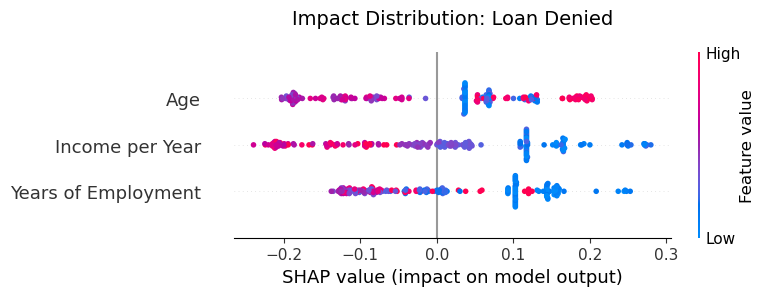

In [2]:

current_shap_raw = np.array(all_shap_dict[0])
s_flat, d_flat, names = get_flattened_data(current_shap_raw)
plt.figure(figsize=(10, 6))
shap.summary_plot(s_flat, d_flat, feature_names=names, show=False)
plt.title(f"Impact Distribution: Loan Denied", fontsize=14, pad=20)
plt.show()

### 2. Global Feature Importance
**What is this?** The mean absolute SHAP value for each feature.  
**What to focus on:** The length of the bar. It represents the "global" influence of a feature—how much it moves the prediction on average, regardless of direction.

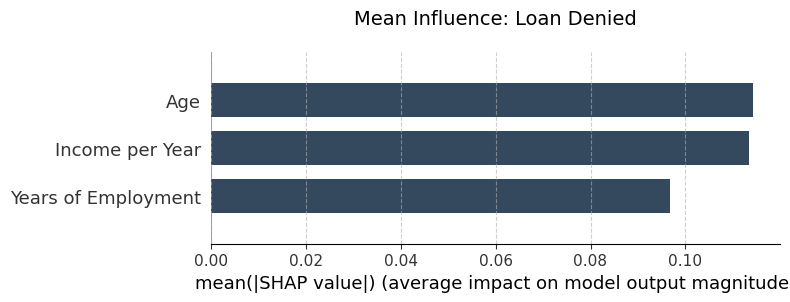

In [3]:

plt.figure(figsize=(10, 6))
shap.summary_plot(s_flat, d_flat, feature_names=names, plot_type='bar', show=False, color='#34495e')
plt.title(f"Mean Influence: Loan Denied", fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### 4. Focused View: Top 5 Drivers
**What is this?** A high-precision look at the five most critical variables for `Loan Denied`.  
**What to focus on:** The gap between the 1st and 5th feature. If the 1st is much larger, the model is heavily reliant on a single "smoking gun" variable.

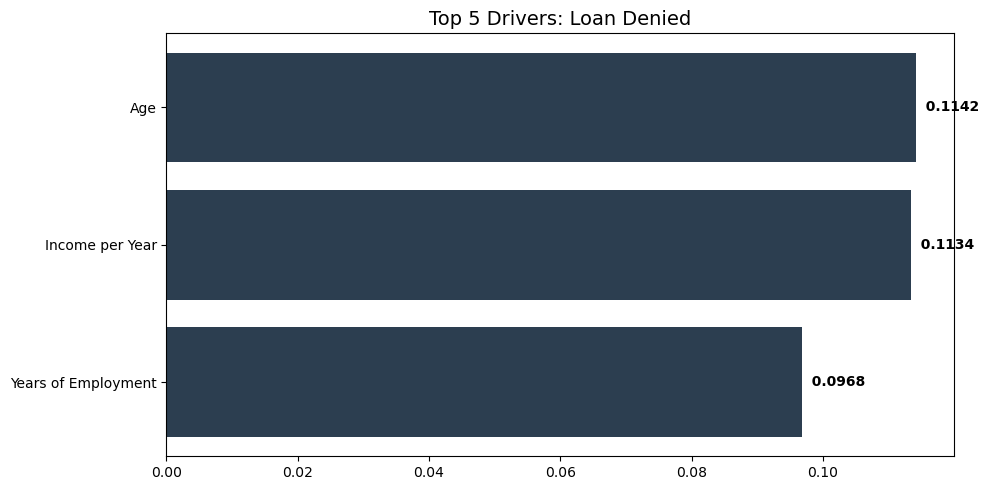

In [4]:

mean_shap = np.abs(s_flat).mean(axis=0)
sorted_idx = np.argsort(mean_shap)[-5:]
plt.figure(figsize=(10, 5))
plt.barh([names[i] for i in sorted_idx], mean_shap[sorted_idx], color='#2c3e50')
plt.title(f"Top 5 Drivers: Loan Denied", fontsize=14)
for i, v in enumerate(mean_shap[sorted_idx]):
    plt.text(v, i, f"  {v:.4f}", va='center', fontweight='bold')
plt.tight_layout()
plt.show()

--- 
# Analysis for: **Loan Approved**

## 🎯 Analysis for Target: `Loan Approved`
---

### 1. Feature Impact Distribution (Beeswarm)
**What is this?** A distribution of SHAP values for every sample in the dataset.  
**What to focus on:** * **Horizontal Position:** Points to the right increase the model output; points to the left decrease it.
* **Color:** Represents the feature value (**Red** is high, **Blue** is low). 
* **Insight:** If Red points are on the right, the feature has a positive correlation with the target.

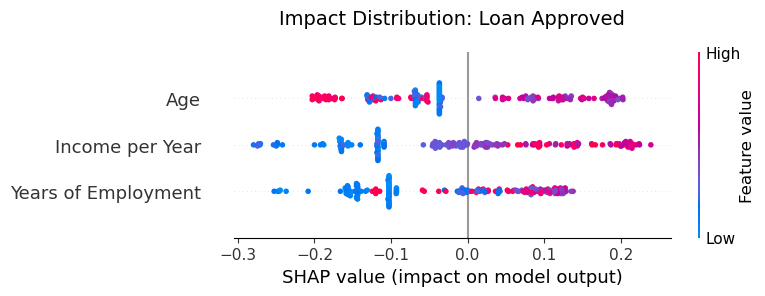

In [5]:

current_shap_raw = np.array(all_shap_dict[1])
s_flat, d_flat, names = get_flattened_data(current_shap_raw)
plt.figure(figsize=(10, 6))
shap.summary_plot(s_flat, d_flat, feature_names=names, show=False)
plt.title(f"Impact Distribution: Loan Approved", fontsize=14, pad=20)
plt.show()

### 2. Global Feature Importance
**What is this?** The mean absolute SHAP value for each feature.  
**What to focus on:** The length of the bar. It represents the "global" influence of a feature—how much it moves the prediction on average, regardless of direction.

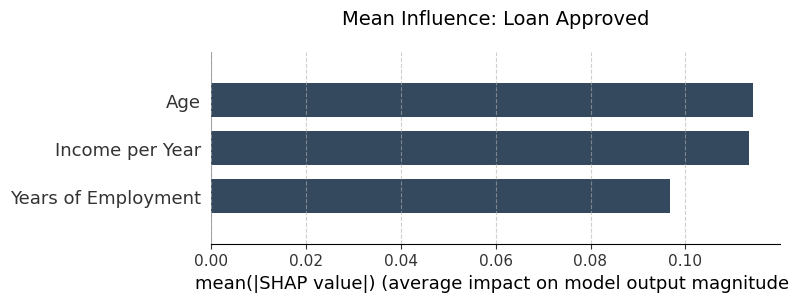

In [6]:

plt.figure(figsize=(10, 6))
shap.summary_plot(s_flat, d_flat, feature_names=names, plot_type='bar', show=False, color='#34495e')
plt.title(f"Mean Influence: Loan Approved", fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### 4. Focused View: Top 5 Drivers
**What is this?** A high-precision look at the five most critical variables for `Loan Approved`.  
**What to focus on:** The gap between the 1st and 5th feature. If the 1st is much larger, the model is heavily reliant on a single "smoking gun" variable.

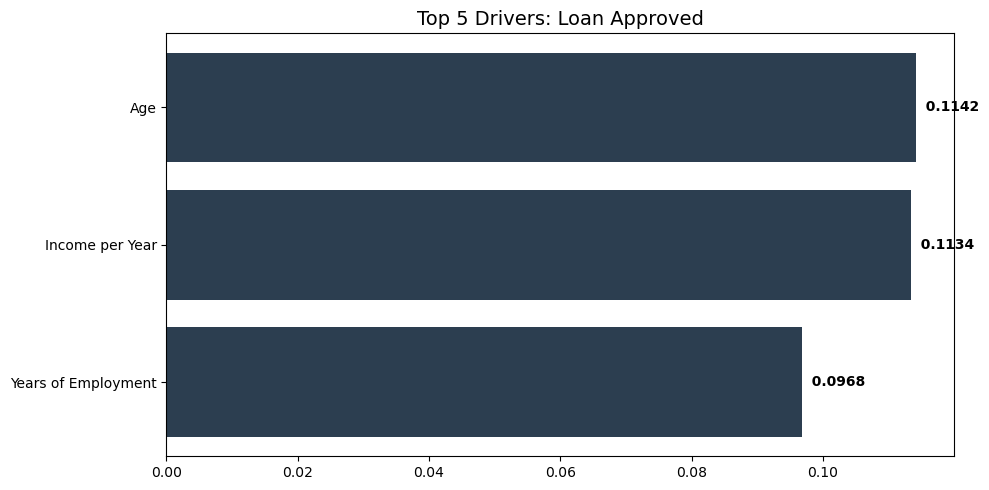

In [7]:

mean_shap = np.abs(s_flat).mean(axis=0)
sorted_idx = np.argsort(mean_shap)[-5:]
plt.figure(figsize=(10, 5))
plt.barh([names[i] for i in sorted_idx], mean_shap[sorted_idx], color='#2c3e50')
plt.title(f"Top 5 Drivers: Loan Approved", fontsize=14)
for i, v in enumerate(mean_shap[sorted_idx]):
    plt.text(v, i, f"  {v:.4f}", va='center', fontweight='bold')
plt.tight_layout()
plt.show()